In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### Do Feature Scaling

In [57]:
y = y.reshape(len(y) , 1)

In [58]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
print(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [59]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[170370.0204065]])

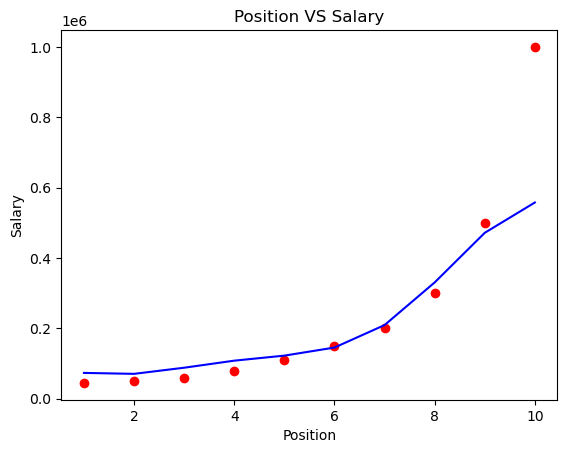

In [63]:
# Visualize the results
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Position VS Salary')
plt.show()